# Drifting Upstream: Data Wrangling

## Load Libraries

In [1061]:
import os
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

We'll be using a __[dataset](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)__ of the top streamed songs of 2023.

In [1062]:
df = pd.read_csv('spotify-2023.csv', encoding='latin1')

Note that the encoding 'latin1' was used here. This is because without this or with 'utf-8' as encoding, the cell execution throws an error.

Let's take an initial look at some of the rows and columns.

In [1063]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [1064]:
df.T.info

<bound method DataFrame.info of                                                       0            1    \
track_name            Seven (feat. Latto) (Explicit Ver.)         LALA   
artist(s)_name                           Latto, Jung Kook  Myke Towers   
artist_count                                            2            1   
released_year                                        2023         2023   
released_month                                          7            3   
released_day                                           14           23   
in_spotify_playlists                                  553         1474   
in_spotify_charts                                     147           48   
streams                                         141381703    133716286   
in_apple_playlists                                     43           48   
in_apple_charts                                       263          126   
in_deezer_playlists                                    45           58   
in_dee

In [1065]:
df.shape

(953, 24)

In [1066]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

## Data Cleaning

### Check for missing values

In [1067]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

We have 50 missing values for the 'in_shazam_charts' column and 95 missing values for the 'key' column. For now we'll leave these be, as we're mostly focused on the other musical feature columns and how they relate to 'streams'.

### Check for duplicates

In [1068]:
df['track_name'].value_counts().head(15)

track_name
Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
Miss You                                  2
Numb                                      2
Die For You                               2
SPIT IN MY FACE!                          2
Flowers                                   2
Seven (feat. Latto) (Explicit Ver.)       1
Polaroid Love                             1
Shallow                                   1
Streets                                   1
AM Remix                                  1
Name: count, dtype: int64

We have 10 song names that are listed twice in the data. Let's take a look at these to see if they are duplicates or separate songs with the same name.

In [1069]:
doubles = df.groupby('track_name').filter(lambda x: len(x) > 1).sort_values('track_name')
doubles

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,21,...,146,NaN,Major,69,63,45,48,0,18,4
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,134,C#,Minor,59,51,52,9,0,15,7
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,...,148,G#,Major,47,15,52,38,13,29,5
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,42,...,138,D#,Major,70,31,44,84,0,9,39
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,...,143,D,Major,60,86,32,88,0,34,6
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,16,6512,0,446390129,88,...,134,C#,Major,45,72,24,91,0,18,4


We can see that some songs with the same name have different artists. This makes sense, as multiple artists might release a song with the same title. Let's further filter for songs that have a duplicated artist value.

In [1070]:
dups = doubles.groupby('artist(s)_name').filter(lambda x: len(x) > 1)
dups

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,134,C#,Minor,59,51,52,9,0,15,7
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,NaN,Major,56,53,64,11,0,45,6
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,NaN,Major,56,52,64,11,0,45,7
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5


In [1071]:
dups = dups.drop(47)
dups

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,NaN,Major,56,53,64,11,0,45,6
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,NaN,Major,56,52,64,11,0,45,7
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5


There are 4 songs that are truly duplicated. Some of these songs have different feature ratings. For example, one listing of The Weeknd's 'Take My Breath' has a valence % of 35, while the other has a valence % of 53. Could it be that these were manually rated and received subjectively different feature ratings? This could lead to doubts in  the consistency of the feature ratings across all songs. Fortunately, most of the ratings between separate entries of the same songs look fairly similar, so let's assume that some inconsistency here and there is leveled off across the larger data set. Another observation is that Lizzo's repeat of 'About Damn Time' has release dates listed for April and July of 2022. A bit of digging on Spotify showed that the April release was the single version, whereas the July release was the album version. This explains the two entries, but doesn't help in deciding which to use. Let's look at all feature values of duplicates and drop the rows that seem less viable. Moreover, we might consolidate values. For example, in the case of 'About Damn Time', we see that the April release appears in more playlists and charts overall, but has 0 for 'in_spotify_charts', whereas the July release has a 2 for this column. In this case, we will keep the April release, but change its 'in_spotify_charts' value to that of the July release.

In [1072]:
dups[:2].T.info

<bound method DataFrame.info of                                   764              372
track_name            About Damn Time  About Damn Time
artist(s)_name                  Lizzo            Lizzo
artist_count                        1                1
released_year                    2022             2022
released_month                      4                7
released_day                       14               15
in_spotify_playlists             9021             2332
in_spotify_charts                   0                2
streams                     723894473        723894473
in_apple_playlists                242                0
in_apple_charts                    49                0
in_deezer_playlists               272               25
in_deezer_charts                   21                0
in_shazam_charts                   24                0
bpm                               109              109
key                                A#               A#
mode                            M

In [1073]:
df = df.drop(372).reset_index(drop=True)
df.loc[df['track_name'] == 'About Damn Time', 'in_spotify_charts'] = 2

We now have to reset dups to assign the appropriate index to each track, as dropping the Lizzo duplicate will shift all subsequent indexes by one.

In [1074]:
dups = df.groupby('track_name').filter(lambda x: len(x) > 1).sort_values('track_name').groupby('artist(s)_name').filter(lambda x: len(x) > 1).drop(47)

In [1075]:
dups[:2].T.info

<bound method DataFrame.info of                             872        178
track_name                 SNAP       SNAP
artist(s)_name        Rosa Linn  Rosa Linn
artist_count                  1          1
released_year              2022       2022
released_month                3          3
released_day                 19         19
in_spotify_playlists       1818       3202
in_spotify_charts             0         18
streams               711366595  726307468
in_apple_playlists            3        148
in_apple_charts               0         80
in_deezer_playlists          63        226
in_deezer_charts              0         24
in_shazam_charts            353          0
bpm                         170        170
key                         NaN        NaN
mode                      Major      Major
danceability_%               56         56
valence_%                    52         53
energy_%                     64         64
acousticness_%               11         11
instrumentalness_%    

In [1076]:
df = df.drop(872).reset_index(drop=True)
df.loc[df['track_name'] == 'SNAP', 'in_shazam_charts'] = '353'
#Note that because 'in_shazam_charts' and 'in_deezer_playlists' are object columns, we will enter the values as strings, to later convert to int

In [1077]:
dups = df.groupby('track_name').filter(lambda x: len(x) > 1).sort_values('track_name').groupby('artist(s)_name').filter(lambda x: len(x) > 1).drop(47)

In [1078]:
dups[:2].T.info

<bound method DataFrame.info of                                    345               481
track_name            SPIT IN MY FACE!  SPIT IN MY FACE!
artist(s)_name                ThxSoMch          ThxSoMch
artist_count                         1                 1
released_year                     2022              2022
released_month                      10                10
released_day                        31                31
in_spotify_playlists               629               573
in_spotify_charts                   14                 0
streams                      303216294         301869854
in_apple_playlists                  32                 1
in_apple_charts                      3                 0
in_deezer_playlists                  9                18
in_deezer_charts                     0                 0
in_shazam_charts                     0                24
bpm                                 94               166
key                                 G#                C#

In [1079]:
df = df.drop(481).reset_index(drop=True)

#Due to the differing values on key and tempo, I checked this one manually. It's in fact in G minor, and the faster tempo

df.loc[df['track_name'] == 'SPIT IN MY FACE!', ['in_deezer_playlists', 'in_shazam_charts', 'bpm', 'key', 'mode']] \
                                                = ['18', '24', 166, 'G', 'Minor']

In [1080]:
dups = df.groupby('track_name').filter(lambda x: len(x) > 1).sort_values('track_name').groupby('artist(s)_name').filter(lambda x: len(x) > 1).drop(47)

In [1081]:
dups.T.info

<bound method DataFrame.info of                                  510             614
track_name            Take My Breath  Take My Breath
artist(s)_name            The Weeknd      The Weeknd
artist_count                       1               1
released_year                   2021            2021
released_month                     8               8
released_day                       6               6
in_spotify_playlists            2597            6392
in_spotify_charts                  0               0
streams                    130655803       432702334
in_apple_playlists                17             174
in_apple_charts                   80              73
in_deezer_playlists               38             344
in_deezer_charts                   0               0
in_shazam_charts                   0               0
bpm                              121             121
key                               A#              G#
mode                           Minor           Major
danceability_%

In [1082]:
df = df.drop(510).reset_index(drop=True)

#Another one with multiple keys, and in fact, after personally checking, the key is actually C minor.

df.loc[df['track_name'] == 'Take My Breath', ['in_apple_charts', 'key', 'mode']] \
                                                = [80, 'C', 'Minor']

#I'll investigate a few other songs' keys to make sure this field is reliable.

In [1083]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [1084]:
#Upon checking the keys of the first 5 songs in the df, 4/5 have the correct key listed.

df.loc[df['track_name'] == 'LALA', 'key'] = 'F#'

#Given this, we'll assume that the key's listed are mostly correct, but we'll take the 'key' fields with a grain of salt.

In [1085]:
dups = df.groupby('track_name').filter(lambda x: len(x) > 1).sort_values('track_name').groupby('artist(s)_name').filter(lambda x: len(x) > 1)
dups

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [1086]:
df.shape

(949, 24)

### Investigate data types of each column

In [1087]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

The 'streams' column is an object. This is our tartget column. We want an int64 for numerical computation. Let's check the number of digits per value in the 'streams' column to see if any seem irregular.

In [1088]:
collections.Counter([len(x) for x in df['streams']])

Counter({9: 644, 10: 152, 8: 150, 4: 1, 7: 1, 102: 1})

150 songs have a stream count with 8 digits (as in 10,000,000 - 99,999,999 streams).
648 songs have a stream count with 9 digits.
152 songs have a stream count with 10 digits.
The row with 102 digits seems wrong. Perhaps there is some text in this value.

In [1089]:
df['streams'][df['streams'].str.contains('[A-Za-z]')]

571    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object

Indeed. Let's drop this row from the data frame as it won't be helpful to our model without a stream count.

In [1090]:
df = df[~df['streams'].str.contains('[A-Za-z]')].reset_index(drop=True)

In [1091]:
collections.Counter([len(x) for x in df['streams']])

Counter({9: 644, 10: 152, 8: 150, 4: 1, 7: 1})

That did the trick. But what about the rows with 4 and 7 digit stream counts?
Presuming that all other 'stream' rows only contain numbers, let's convert these to integers and look at the outliers.

In [1092]:
df['streams'] = df['streams'].astype(int)

In [1093]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [1094]:
df['streams'][df['streams'] < 10_000_000]

123       2762
392    1365184
Name: streams, dtype: int64

Considering that all other songs have over 10M streams, these two are particularly low in comparison.
Let's drop them from the dataset since stream count is our target variable.

In [1095]:
df = df.drop([123, 393]).reset_index(drop=True)

In [1096]:
df.shape

(946, 24)

While we're at it, we should investigate the 'in_deezer_playlists' column, as it's also currently an object, but it should be an int64.
It looks like this column has a comma in some of its values. Let's fix this.

In [1097]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')

In [1098]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)

We face a similar scenario with the 'in_shazam_charts' columns, but here we also have 50 missing values. For now we'll keep this column as an object.

In [1099]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')

In [1100]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Next let's address our other column with missing values: 'key'. Though the use of this column remains ambiguous considering its missing values, since 'key' describes a musical attribute, it may be useful to our analysis of which musical attributes relate to 'streams'.

In [1101]:
df['key'].unique()

array(['B', 'F#', 'F', 'A', 'C#', 'D', nan, 'G#', 'G', 'E', 'A#', 'D#',
       'C'], dtype=object)

We can see that aside from the nan values, there are 12 unique values for key, one for each note of the chromatic scale. To make this more suitable for machine learning, we want to represent these values numerically, but not ordinally, as the 'key' is a categorical aspect of the music. Thus, we will create a separate column for each key value, and assign a '1' if the song is in that key, or a '0' if it's in another key. Therefore every song (excluding nan's) will have one '1' among the 'key' columns and '0's for all other key columns.

In [1102]:
df['key_A'] = df['key'].apply(lambda x: 1 if x == 'A' else 0).astype('category')
df['key_A#'] = df['key'].apply(lambda x: 1 if x == 'A#' else 0).astype('category')
df['key_B'] = df['key'].apply(lambda x: 1 if x == 'B' else 0).astype('category')
df['key_C'] = df['key'].apply(lambda x: 1 if x == 'C' else 0).astype('category')
df['key_C#'] = df['key'].apply(lambda x: 1 if x == 'C#' else 0).astype('category')
df['key_D'] = df['key'].apply(lambda x: 1 if x == 'D' else 0).astype('category')
df['key_D#'] = df['key'].apply(lambda x: 1 if x == 'D#' else 0).astype('category')
df['key_E'] = df['key'].apply(lambda x: 1 if x == 'E' else 0).astype('category')
df['key_F'] = df['key'].apply(lambda x: 1 if x == 'F' else 0).astype('category')
df['key_F#'] = df['key'].apply(lambda x: 1 if x == 'F#' else 0).astype('category')
df['key_G'] = df['key'].apply(lambda x: 1 if x == 'G' else 0).astype('category')
df['key_G#'] = df['key'].apply(lambda x: 1 if x == 'G#' else 0).astype('category')

We will convert the 'mode' column values from 'Minor' or 'Major' to categorical 0's or 1's as well

In [1103]:
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [1104]:
df.loc[df['mode'] == 'Major', 'mode'] = 1
df.loc[df['mode'] == 'Minor', 'mode'] = 0

In [1105]:
df['mode'].unique()

array([1, 0], dtype=object)

We might also consider a time series analysis to assess how features have trended over time. Currently we have the release date of each song across 3 integer columns, 'released_year', 'released_month', and 'released_day'. Let's add a datetime column for these.

In [1106]:
df = df.rename(columns={'released_year': 'year', 'released_month': 'month', 'released_day': 'day'})
df['release_date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [1107]:
df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
year                             int64
month                            int64
day                              int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists              int64
in_deezer_charts                 int64
in_shazam_charts                object
bpm                              int64
key                             object
mode                            object
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
key_A                         category
key_A#                   

In [1108]:
df.T.info

<bound method DataFrame.info of                                                       0    \
track_name            Seven (feat. Latto) (Explicit Ver.)   
artist(s)_name                           Latto, Jung Kook   
artist_count                                            2   
year                                                 2023   
month                                                   7   
day                                                    14   
in_spotify_playlists                                  553   
in_spotify_charts                                     147   
streams                                         141381703   
in_apple_playlists                                     43   
in_apple_charts                                       263   
in_deezer_playlists                                    45   
in_deezer_charts                                       10   
in_shazam_charts                                      826   
bpm                                                  

## Summary statistics

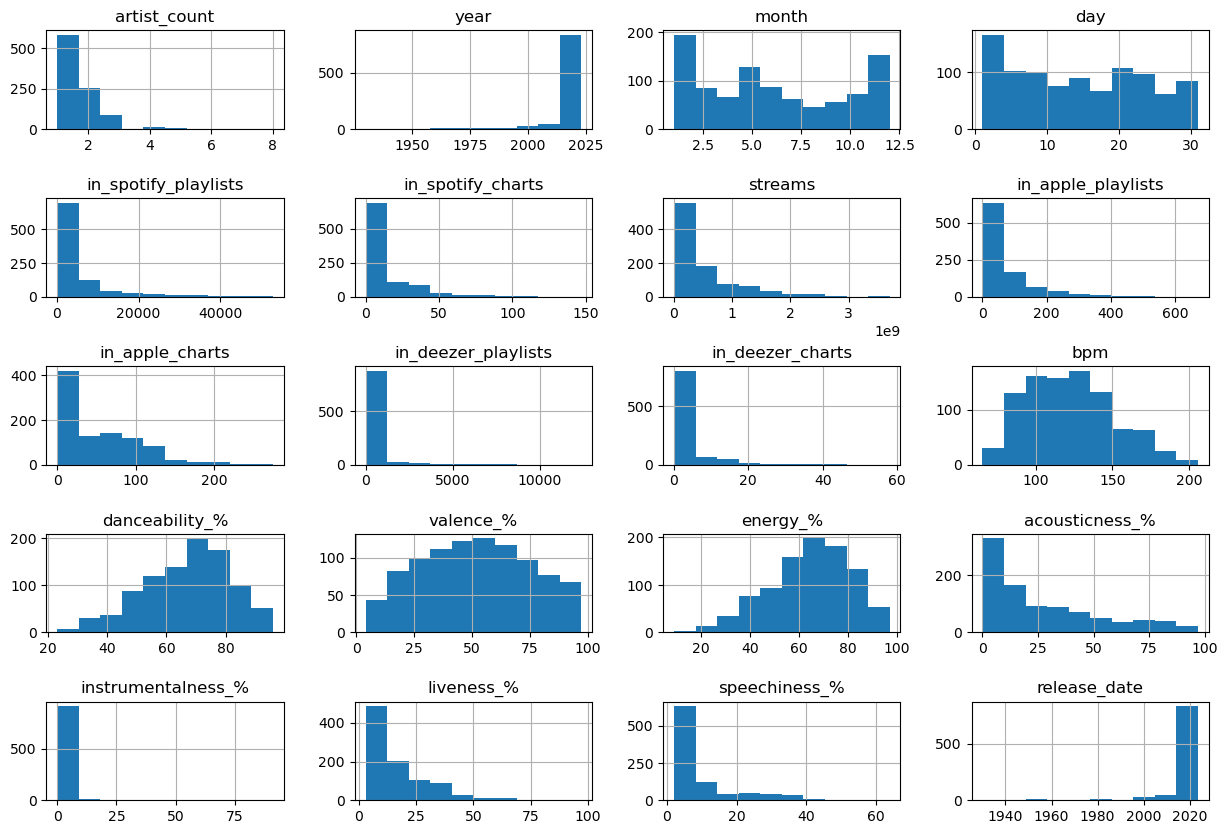

In [1109]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.7);

Some of these distributions have long tails. Let's examine a few of the instances that are farthest away from the mean.

In [1110]:
min(df['year'])

1930

In [1111]:
df[df['year'] < 1950]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
436,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",3,1930,1,1,323,0,90598517,4,...,0,0,0,0,0,0,1,0,0,1930-01-01
457,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,1946,11,1,11500,0,389771964,140,...,0,1,0,0,0,0,0,0,0,1946-11-01
466,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,395591396,73,...,0,0,0,0,0,0,0,0,0,1942-01-01


Hm, the song from 1930 looks strange. There must be something odd going on with the encoding. Could there be other values like this? We'll have to investigate further. As for this song, I looked it up on Spotify (searching for similar results sans the symbols) but couldn't find a matching result.
We'll drop this one. The other songs here look fine though and wow, 2 of 2023's top streamed songs were released in the 1940s!

In [1112]:
df = df.drop(436).reset_index(drop=True)

In [1113]:
max(df['in_deezer_playlists'])

12367

In [1114]:
df[df['in_deezer_playlists'] > 7500]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
617,Smells Like Teen Spirit - Remastered 2021,Nirvana,1,1991,9,10,49991,9,1690192927,265,...,0,1,0,0,0,0,0,0,0,1991-09-10
750,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,...,0,0,0,0,0,0,1,0,0,2013-01-01
902,The Scientist,Coldplay,1,2002,8,5,30992,6,1608164312,124,...,0,0,0,0,0,1,0,0,0,2002-08-05


In [1115]:
max(df['in_deezer_charts'])

58

In [1116]:
df[df['in_deezer_charts'] > 30]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,0,0,0,0,0,0,0,0,0,2023-01-12
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,0,0,0,0,0,0,1,0,0,2022-03-31
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,899183384,202,...,0,0,0,0,0,0,0,0,0,2022-03-25
29,Dance The Night (From Barbie The Album),Dua Lipa,1,2023,5,25,2988,101,127408954,0,...,0,0,0,0,0,0,0,0,0,2023-05-25
42,I'm Good (Blue),"Bebe Rexha, David Guetta",2,2022,8,26,12482,80,1109433169,291,...,0,0,0,0,0,0,0,1,0,2022-08-26
46,I Ain't Worried,OneRepublic,1,2022,5,13,8431,76,1085685420,241,...,0,0,0,0,0,0,0,0,0,2022-05-13
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,0,1,0,0,0,0,0,0,0,2021-07-09
106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",3,2017,11,10,21097,52,1605224506,384,...,0,1,0,0,0,0,0,0,0,2017-11-10


Here we see that strange symbol again: 'ï¿½ï¿½'. In this case, it is a song title. Let's see if this comes up elsewhere in the data.

In [1117]:
df[df['track_name'].str.contains('ï|¿|½')].shape

(65, 37)

In [1118]:
df[df['artist(s)_name'].str.contains('ï|¿|½')].shape

(48, 37)

Looks like we've got some cleanup to do in order to preserve the actual song and artist names. Though tedious, we'll have to manually correct these. The process will entail locating the song on Spotify based on the available letters of the artist name and/or song title, and then re-entering the correct title.

### Detour: Additional Data Cleaning

Since it appears that the encoding issue occurred for names with apostrophes and accents, let's first make sure that other song titles don't have accents on letters, so we know how to properly encode these song titles to be consistent with the rest of the data.

In [1119]:
df[df['track_name'].str.contains('á')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date


In [1120]:
df[df['track_name'].str.contains('é')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date


In [1121]:
df[df['track_name'].str.contains('ñ')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date


As expected, it looks like the other song titles don't have accents, so we'll list our song titles without accents. In order to view the indexes in chunks, we'll break the 65 songs into three parts.

In [1122]:
df[df['track_name'].str.contains('ï|¿|½')].head(20)

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,0,0,0,0,0,0,1,0,0,2023-07-07
36,Frï¿½ï¿½gil (feat. Grupo Front,"Yahritza Y Su Esencia, Grupo Frontera",2,2023,4,7,672,34,188933502,19,...,0,0,0,0,0,0,1,0,0,2023-04-07
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",2,2023,5,4,731,15,111947664,27,...,0,0,0,0,0,0,0,0,0,2023-05-04
79,CORAZï¿½ï¿½N VA,Maria Becerra,1,2023,6,22,370,20,43857627,12,...,0,1,0,0,0,0,0,0,0,2023-06-22
82,Novidade na ï¿½ï¿,"Mc Livinho, DJ Matt D",2,2023,6,23,267,9,39709092,9,...,0,0,0,0,0,1,0,0,0,2023-06-23
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,0,0,0,0,0,0,0,0,0,2017-11-08
124,Feliz Cumpleaï¿½ï¿½os Fe,Feid,1,2022,8,19,3430,38,601863821,45,...,0,0,0,0,0,1,0,0,0,2022-08-19
140,Novo Balanï¿½,"Veigh, Bvga Beatz, Supernova Ent, Prod Malax",4,2023,5,19,283,7,81102253,6,...,0,0,0,1,0,0,0,0,0,2023-05-19
190,You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve,Taylor Swift,1,2021,4,9,2619,12,350381515,47,...,0,0,0,0,0,0,1,0,0,2021-04-09
191,Titi Me Preguntï¿,Bad Bunny,1,2022,5,6,9037,42,1264310836,124,...,0,0,0,0,0,1,0,0,0,2022-05-06


In [1123]:
df.at[21, 'track_name'] = 'I Can See You (Taylor\'s Version) (From The Vault)'
df.at[36, 'track_name'] = 'Fragil'
df.at[60, 'track_name'] = 'Ta OK'
df.at[79, 'track_name'] = 'CORAZON VACIO'
df.at[82, 'track_name'] = 'Novidade na Area'

df.at[93, 'track_name'] = 'Don\'t Blame Me'
df.at[124, 'track_name'] = 'Feliz Cumpleanos Ferxxo'
df.at[140, 'track_name'] = 'Novo Balanco'
df.at[190, 'track_name'] = 'You Belong With Me (Taylor\'s Version)'
df.at[191, 'track_name'] = 'Titi Me Pregunto'

df.at[201, 'track_name'] = 'Acrostico'
df.at[211, 'track_name'] = 'Pisman Degilim'
df.at[211, 'artist(s)_name'] = 'Semicenk, Dogu Swag'
df.at[233, 'track_name'] = 'Nina Bonita'
df.at[246, 'track_name'] = 'Cartao Black'
df.at[246, 'artist(s)_name'] = 'MC Caverinha, KayBlack, Wall Hein'
df.at[246, 'artist_count'] = 3
df.at[257, 'track_name'] = 'Conexoes de Mafia (feat. Rich The Kid)'
df.at[257, 'artist(s)_name'] = 'Matue, Rich The Kid'

df.at[264, 'track_name'] = 'Cupid - Twin Ver. (FIFTY FIFTY) - Sped Up Version'
df.at[264, 'year'] = 2023
df.at[264, 'release_date'] = '2023-04-08'
df.at[274, 'track_name'] = 'Igualito a Mi Apa'
df.at[277, 'track_name'] = 'DESPECHA'
df.at[300, 'track_name'] = 'Arcangel: Bzrp Music Sessions, Vol. 54'
df.at[308, 'track_name'] = 'Leao'

In [1124]:
df[df['track_name'].str.contains('ï|¿|½')].head(20)

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
335,Ainï¿½ï¿½ï¿½t Tha,Morgan Wallen,1,2023,3,3,356,4,88791109,4,...,0,0,0,0,0,0,1,0,0,2023-03-03
336,Thinkinï¿½ï¿½ï¿½ B,Morgan Wallen,1,2023,3,3,604,6,125917280,22,...,0,0,0,1,0,0,0,0,0,2023-03-03
345,PLAYA DEL INGLï¿½,"Myke Towers, Quevedo",2,2022,12,15,1701,15,221409663,30,...,0,0,0,0,0,0,0,1,0,2022-12-15
350,PERO Tï¿,"Karol G, Quevedo",2,2023,2,23,387,11,93438910,11,...,0,0,0,0,0,0,1,0,0,2023-02-23
353,Monotonï¿½,"Ozuna, Shakira",2,2022,10,19,3645,15,380726517,118,...,0,0,0,0,0,0,0,0,0,2022-10-19
363,Sem Alianï¿½ï¿½a no,"MC Xenon, Os Gemeos da Putaria",2,2022,12,23,454,4,93587665,6,...,0,1,0,0,0,0,0,0,0,2022-12-23
367,LA CANCIï¿½,"J Balvin, Bad Bunny",2,2019,6,28,6398,31,1435127549,177,...,0,0,0,0,0,0,0,1,0,2019-06-28
368,Quï¿½ï¿½ Ago,"Yuridia, Angela Aguilar",2,2022,10,20,660,15,236857112,19,...,0,0,0,0,0,0,0,0,0,2022-10-20
377,Devil Donï¿½ï¿½ï¿½,Morgan Wallen,1,2023,3,3,166,0,32526947,2,...,0,0,0,0,0,0,0,0,0,2023-03-03
395,Muï¿½ï¿½,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253,33,...,0,0,0,0,0,0,0,0,0,2023-01-12


In [1125]:
df.at[335, 'track_name'] = 'Ain\'t That Some'
df.at[336, 'track_name'] = 'Thinkin\' Bout Me'
df.at[345, 'track_name'] = 'PLAYA DEL INGLES'
df.at[350, 'track_name'] = 'PERO TU'
df.at[353, 'track_name'] = 'Monotonia'

df.at[363, 'track_name'] = 'Sem Alianca no Dedo'
df.at[367, 'track_name'] = 'LA CANCION'
df.at[368, 'track_name'] = 'Que Agonia'
df.at[377, 'track_name'] = 'Devil Don\'t Know'
df.at[395, 'track_name'] = 'Munecas'

df.at[428, 'track_name'] = 'Evergreen (You Didn\'t Deserve Me At All)'
df.at[483, 'track_name'] = 'Tubarao Te Amo'
df.at[483, 'artist(s)_name'] = 'Dj LK da Escocia, Tchakabum, MC Ryan SP, mc jhenny, Mc RF'
df.at[483, 'artist_count'] = 5
df.at[494, 'track_name'] = 'GATUBELA'
df.at[508, 'track_name'] = 'Here We Go... Again (feat. Tyler, the Creator)'
df.at[530, 'track_name'] = 'Malvadao 3'

df.at[532, 'track_name'] = 'Don\'t Break My Heart'
df.at[541, 'track_name'] = 'Volvi'
df.at[551, 'track_name'] = 'L\'enfer'
df.at[552, 'track_name'] = 'Nostalgico'
df.at[594, 'track_name'] = 'Vai La Em Casa Hoje'
df.at[594, 'artist(s)_name'] = 'George Henrique & Rodrigo, Marilia Mendonca'

In [1126]:
df[df['track_name'].str.contains('ï|¿|½')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
611,Cï¿½ï¿½,Rauw Alejandro,1,2021,6,25,2636,3,465959382,36,...,0,0,0,0,0,0,0,0,0,2021-06-25
615,Quï¿½ï¿½ Mï¿½ï¿,"J Balvin, Maria Becerra",2,2021,1,28,8087,0,720825549,92,...,0,0,0,0,0,0,0,0,1,2021-01-28
637,When Iï¿½ï¿½ï¿½m Gone (with Katy,"Katy Perry, Alesso",2,2021,12,29,3270,0,226897599,89,...,0,0,0,0,0,0,0,0,0,2021-12-29
638,Esqueï¿½ï¿½a-Me Se For C,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, Maiara &",2,2021,10,14,580,0,258316038,24,...,0,0,0,0,0,0,1,0,0,2021-10-14
639,Miï¿½ï¿½n,"Tini, Maria Becerra",2,2021,4,29,3406,16,596152090,61,...,0,0,1,0,0,0,0,0,0,2021-04-29
640,Sï¿½ï¿½,"Anuel Aa, Myke Towers, Jhay Cortez",3,2021,11,18,903,0,177129919,30,...,0,0,0,0,0,0,1,0,0,2021-11-18
660,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7,2022,1,14,1034,1,245400167,19,...,0,0,0,0,0,1,0,0,0,2022-01-14
672,Problemï¿½,"Alvaro Diaz, Rauw Alejandro",2,2021,10,22,1517,0,209768491,42,...,0,0,1,0,0,0,0,0,0,2021-10-22
686,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",2,2019,6,19,15010,2,2484812918,453,...,0,0,0,0,0,0,0,0,0,2019-06-19
693,Una Noche en Medellï¿½,Cris Mj,1,2022,1,21,5415,32,682475162,46,...,0,0,0,0,0,0,0,0,0,2022-01-21


In [1127]:
df.at[611, 'track_name'] = 'Curame'
df.at[615, 'track_name'] = 'Que Mas Pues?'
df.at[637, 'track_name'] = 'When I\'m Gone (with Katy Perry)'
df.at[638, 'track_name'] = 'Esqueca-Me Se For Capaz'
df.at[638, 'artist(s)_name'] = 'Marilia Mendonca, Maiara & Maraisa'
df.at[639, 'track_name'] = 'Mienteme'

df.at[640, 'track_name'] = 'Subelo'
df.at[640, 'artist(s)_name'] = 'Anuel AA, Myke Towers, Jhayco'
df.at[660, 'track_name'] = 'Cayo La Noche (feat. Cruz Cafune, Abhir Hathi, Bejo, EL IMA) [Remix]'
df.at[660, 'artist(s)_name'] = 'La Pantera, Quevedo, Juseph, Abhir Hathi, Bejo, Cruz Cafune, EL IMA'
df.at[672, 'track_name'] = 'Problemon'
df.at[686, 'track_name'] = 'Senorita'
df.at[693, 'track_name'] = 'Una Noche en Medellin'

df.at[698, 'track_name'] = 'DANCARINA'
df.at[715, 'track_name'] = 'Money so big'
df.at[725, 'track_name'] = 'X ULTIMA VEZ'
df.at[738, 'track_name'] = 'Me Arrepenti'
df.at[741, 'track_name'] = 'RUMBATON'

df.at[759, 'track_name'] = 'Despues de la Playa'
df.at[781, 'track_name'] = 'Ensename a Bailar'
df.at[782, 'track_name'] = 'El Apagon'
df.at[803, 'track_name'] = 'TUS LAGRIMAS'
df.at[816, 'track_name'] = 'This Love (Taylor\'s Version)'

df.at[830, 'track_name'] = 'La Llevo Al Cielo (Ft. Nengo Flow)'
df.at[873, 'track_name'] = 'como dormiste?'
df.at[877, 'track_name'] = 'Si Te La Encuentras Por Ahi'
df.at[905, 'track_name'] = 'XQ Te Pones Asi'
df.at[907, 'track_name'] = 'SIN SENAL'

In [1128]:
df[df['track_name'].str.contains('ï|¿|½')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date


Phew! Got that out of the way. One takeaway from this process is inconsistencies with capitalizations. We'll have to keep this in mind if we merge any other data frames and be sure to use str.lower(). Now we just need to complete these same corrections for 'artist(s)_name'. Let's double check that accents don't occur in artist names.

In [1129]:
df[df['artist(s)_name'].str.contains('á')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date


In [1130]:
df[df['artist(s)_name'].str.contains('é')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date


In [1131]:
df[df['artist(s)_name'].str.contains('ñ')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date


Also no accents. Well, here we go...

In [1132]:
df[df['artist(s)_name'].str.contains('ï|¿|½')].shape

(42, 37)

In [1133]:
df[df['artist(s)_name'].str.contains('ï|¿|½')].head(18)

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,899183384,202,...,0,0,0,0,0,0,0,0,0,2022-03-25
63,BESO,"Rauw Alejandro, ROSALï¿½",2,2023,3,24,4053,50,357925728,82,...,0,0,0,0,0,1,0,0,0,2023-03-24
112,LAGUNAS,"Jasiel Nuï¿½ï¿½ez, Peso P",2,2023,6,22,58,18,39058561,2,...,0,0,0,0,0,0,0,0,0,2023-06-22
118,VAGABUNDO,"Sebastian Yatra, Manuel Turizo, Beï¿½ï",3,2023,5,12,1094,34,90839753,40,...,0,0,0,0,0,0,0,0,0,2023-05-12
145,Ojitos Lindos,"Bomba Estï¿½ï¿½reo, Bad B",2,2022,5,6,6135,38,1133865788,71,...,0,0,0,1,0,0,0,0,0,2022-05-06
209,Abcdario,"Junior H, Eden Muï¿½ï",2,2023,5,13,262,5,89933133,8,...,0,0,0,0,0,0,0,0,1,2023-05-13
230,CUFF IT,Beyoncï¿,1,2022,7,29,7842,10,595900742,215,...,0,0,0,0,0,0,0,1,0,2022-07-29
235,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,57089066,34,...,0,1,0,0,0,0,0,0,0,2023-05-19
248,Oi Balde - Ao Vivo,Zï¿½ï¿½ Neto & Crist,1,2023,2,14,845,2,145458418,12,...,0,0,1,0,0,0,0,0,0,2023-02-14
277,DESPECHA,ROSALï¿½,1,2022,7,28,7613,33,782369383,180,...,0,0,0,0,0,0,0,1,0,2022-07-28


In [1134]:
df.at[26, 'artist(s)_name'] = 'Rema, Selena Gomez'
df.at[63, 'artist(s)_name'] = 'ROSALIA, Rauw Alejandro'
df.at[112, 'artist(s)_name'] = 'Peso Pluma, Jasiel Nunez'
df.at[118, 'artist(s)_name'] = 'Sebastian Yatra, Manuel Turizo, Beele'
df.at[145, 'artist(s)_name'] = 'Bad Bunny, Bomba Estereo'
df.at[209, 'artist(s)_name'] = 'Eden Munoz, Junior H'

df.at[230, 'artist(s)_name'] = 'Beyonce'
df.at[235, 'artist(s)_name'] = 'Beyonce, Kendrick Lamar'
df.at[248, 'artist(s)_name'] = 'Ze Neto & Cristiano'
df.at[277, 'artist(s)_name'] = 'ROSALIA'
df.at[293, 'artist(s)_name'] = 'Peso Pluma, Jasiel Nunez'
df.at[302, 'artist(s)_name'] = 'Tiesto, Tate McRae'

df.at[308, 'artist(s)_name'] = 'Marilia Mendonca'
df.at[373, 'artist(s)_name'] = 'Wisin & Yandel, ROSALIA'
df.at[378, 'artist(s)_name'] = 'ROSALIA'
df.at[390, 'artist(s)_name'] = 'Rema'
df.at[408, 'artist(s)_name'] = 'Elley Duhe'
df.at[441, 'artist(s)_name'] = 'Michael Buble'

In [1135]:
df[df['artist(s)_name'].str.contains('ï|¿|½')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
447,Feliz Navidad,Josï¿½ï¿½ Felic,1,1970,11,1,3788,0,520034544,21,...,0,0,1,0,0,0,0,0,0,1970-11-01
448,Holly Jolly Christmas,Michael Bublï¿,1,2011,10,14,7655,0,476244795,5,...,0,0,0,0,0,0,0,1,0,2011-10-14
520,Beggin,Mï¿½ï¿½ne,1,2017,12,8,8559,0,1367810478,183,...,0,0,0,0,0,0,0,0,0,2017-12-08
524,The Motto,"Tiï¿½ï¿½sto, Ava",2,2021,11,4,9151,6,656013912,240,...,0,0,0,0,0,0,0,1,0,2021-11-04
530,Malvadao 3,"Xamï¿½ï¿½, Gustah, Neo B",3,2021,11,30,648,1,240684449,14,...,0,0,0,0,0,0,1,0,0,2021-11-30
537,Medallo,"Justin Quiles, Lenny Tavï¿½ï¿½rez, BL",3,2021,10,27,2780,2,393230256,54,...,0,0,0,0,1,0,0,0,0,2021-10-27
567,Don't Be Shy,"Tiï¿½ï¿½sto, Kar",2,2021,8,1,6026,0,566954746,171,...,0,0,0,0,0,0,0,0,0,2021-08-01
568,LA FAMA (with The Weeknd),"The Weeknd, ROSALï¿½",2,2021,11,11,4640,3,374706940,81,...,0,0,0,0,0,0,0,0,0,2021-11-11
591,The Business,Tiï¿½ï¿,1,2020,1,1,14311,0,1062345656,255,...,0,0,0,0,0,0,0,0,1,2020-01-01
593,I WANNA BE YOUR SLAVE,Mï¿½ï¿½ne,1,2021,3,19,4873,0,851070493,65,...,0,1,0,0,0,0,0,0,0,2021-03-19


In [1136]:
df.at[447, 'artist(s)_name'] = 'Jose Feliciano'
df.at[448, 'artist(s)_name'] = 'Michael Buble'
df.at[520, 'artist(s)_name'] = 'Maneskin'
df.at[524, 'artist(s)_name'] = 'Tiesto, Ava Max'
df.at[530, 'artist(s)_name'] = 'Xama, Gustah, Neo Beats, Bagua Records'
df.at[530, 'artist_count'] = 4
df.at[537, 'artist(s)_name'] = 'Blessd, Justin Quiles, Lenny Tavarez'

df.at[567, 'artist(s)_name'] = 'Tiesto, KAROL G'
df.at[568, 'artist(s)_name'] = 'ROSALIA, The Weeknd'
df.at[568, 'track_name'] = 'LA FAMA'
df.at[591, 'artist(s)_name'] = 'Tiesto'
df.at[593, 'artist(s)_name'] = 'Maneskin'
df.at[635, 'artist(s)_name'] = 'Dimelo Flow, Dalex, Sech, Justin Quiles, Arcangel, De La Ghetto, Lenny Tavarez'
df.at[635, 'artist_count'] = 7
df.at[675, 'artist(s)_name'] = 'Ze Felipe'

df.at[681, 'artist(s)_name'] = 'Hugo & Guilherme, Marilia Mendonca'
df.at[703, 'artist(s)_name'] = 'Eden Munoz'
df.at[735, 'artist(s)_name'] = 'Matue, WIU, Teto'
df.at[742, 'artist(s)_name'] = 'Davi Kneip, Mc Frog, Dj Gabriel de Borel, Luisa Sonza'
df.at[752, 'artist(s)_name'] = '4*TOWN (From Disney and Pixar\'s Turning Red), Jordan Fisher, Finneas O\'Connell, Topher Ngo, Grayson Villanueva, Josh Levi'
df.at[775, 'artist(s)_name'] = 'Bad Bunny, The Marias'

df.at[791, 'artist(s)_name'] = 'Maneskin'
df.at[856, 'artist(s)_name'] = 'Beyonce'
df.at[862, 'artist(s)_name'] = 'DJ Robin, Schurze'
df.at[879, 'artist(s)_name'] = 'Beyonce'
df.at[910, 'artist(s)_name'] = 'Maneskin'
df.at[921, 'artist(s)_name'] = 'Luciano, Aitch, BIA'

In [1137]:
df[df['artist(s)_name'].str.contains('ï|¿|½')]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date


Okay, now we can return to our analysis of skewed features.

### Back to Summary Statistics

In [1138]:
max(df['instrumentalness_%'])

91

While most of 2023's top streamed songs have a low % of instrumentalness, several are quite higher in this category.

In [1139]:
df[df['instrumentalness_%'] > 30]

,track_name,artist(s)_name,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,release_date
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,0,0,0,0,0,0,0,0,0,2023-05-18
88,Makeba,Jain,1,2015,6,22,6060,53,165484133,150,...,0,0,1,0,0,0,0,0,0,2015-06-22
183,Apocalypse,Cigarettes After Sex,1,2017,3,21,13091,17,841749534,61,...,0,0,0,0,0,1,0,0,0,2017-03-21
237,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",5,2023,6,2,197,0,32761689,3,...,0,0,0,0,0,1,0,0,0,2023-06-02
283,METAMORPHOSIS,INTERWORLD,1,2021,11,25,1561,24,357580552,18,...,0,0,0,0,0,0,0,1,0,2021-11-25
306,I Know - PR1SVX Edit,"Kanii, PR1ISVX",2,2023,3,24,407,0,77377503,16,...,0,0,0,0,0,0,0,0,0,2023-03-24
325,Heart To Heart,Mac DeMarco,1,2019,5,10,1640,0,244658767,27,...,0,0,0,0,0,0,0,0,1,2019-05-10
405,After Dark,Mr.Kitty,1,2014,8,8,1776,14,646886885,1,...,0,0,0,0,0,0,0,0,1,2014-08-08
572,Freaks,Surf Curse,1,2015,5,10,3006,3,824420218,23,...,0,0,0,0,0,0,0,0,0,2015-05-10
677,Alien Blues,Vundabar,1,2015,7,24,1930,0,370068639,3,...,0,0,0,1,0,0,0,0,0,2015-07-24


In [1140]:
df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
year                             int64
month                            int64
day                              int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists              int64
in_deezer_charts                 int64
in_shazam_charts                object
bpm                              int64
key                             object
mode                            object
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
key_A                         category
key_A#                   

Now that we've seen distributions for each feature, let's look at summary statistics per feature.

In [1141]:
df.describe().loc[['min', 'max', 'mean', 'std']].round(0).T

,min,max,mean,std
artist_count,1.0,8.0,2.0,1.0
year,1942.0,2023.0,2018.0,11.0
month,1.0,12.0,6.0,4.0
day,1.0,31.0,14.0,9.0
in_spotify_playlists,31.0,52898.0,5231.0,7923.0
in_spotify_charts,0.0,147.0,12.0,20.0
streams,1365184.0,3703895074.0,515678446.0,568181779.0
in_apple_playlists,0.0,672.0,68.0,87.0
in_apple_charts,0.0,275.0,52.0,51.0
in_deezer_playlists,0.0,12367.0,388.0,1135.0


In [1142]:
def boxplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=2, hspace=0.2)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.boxplot(x=col, data=df)
        ax.set(xlabel=col, ylabel='values')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

#Function adapeted from Capstone 1 exploratory analysis

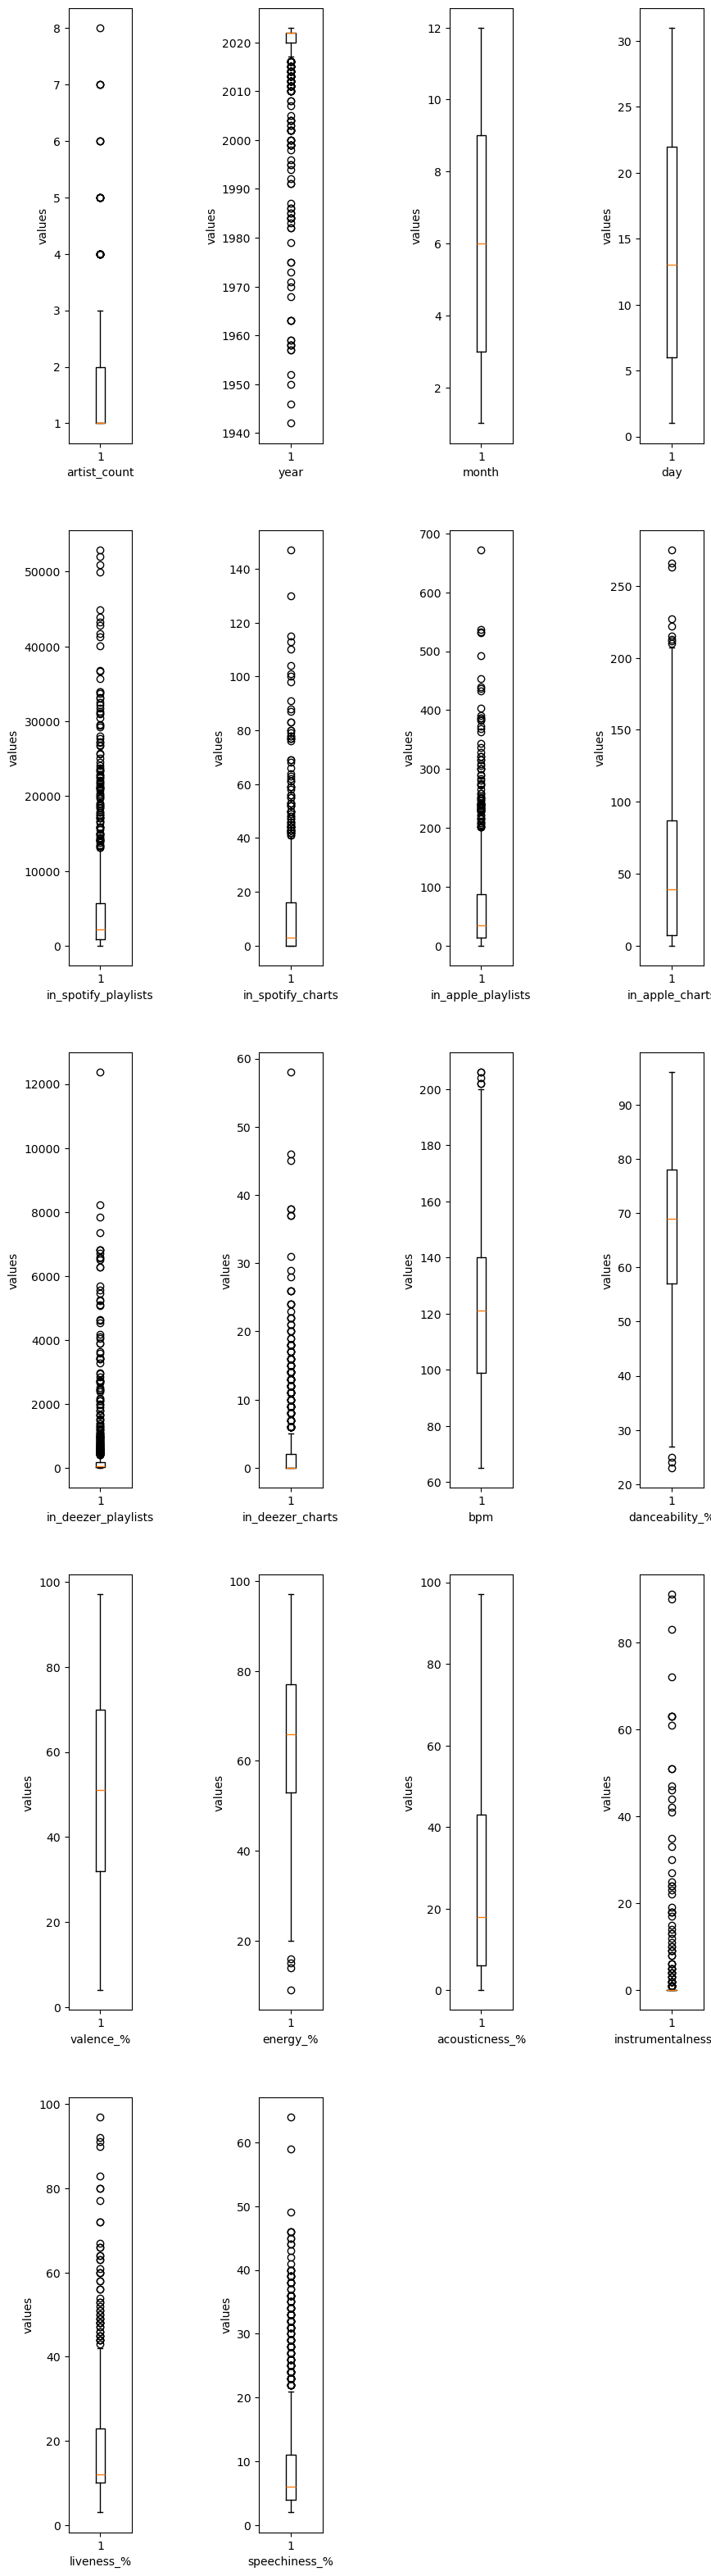

In [1143]:
boxplots(features, ncol=4, figsize=(10, 40))

It appears that several columns have quite a few outliers above the general range.

Let's also assess correlations between our target column, 'streams', and the other features.

In [1144]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'streams', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='streams')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

#Function derived from Capstone 1 exploratory analysis

In [1145]:
features = [x for x in df.columns if x in ['artist_count', 'year', 'month', 'day', 'in_spotify_playlists', 'in_spotify_charts', \
                                                 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', \
                                                 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', \
                                                 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

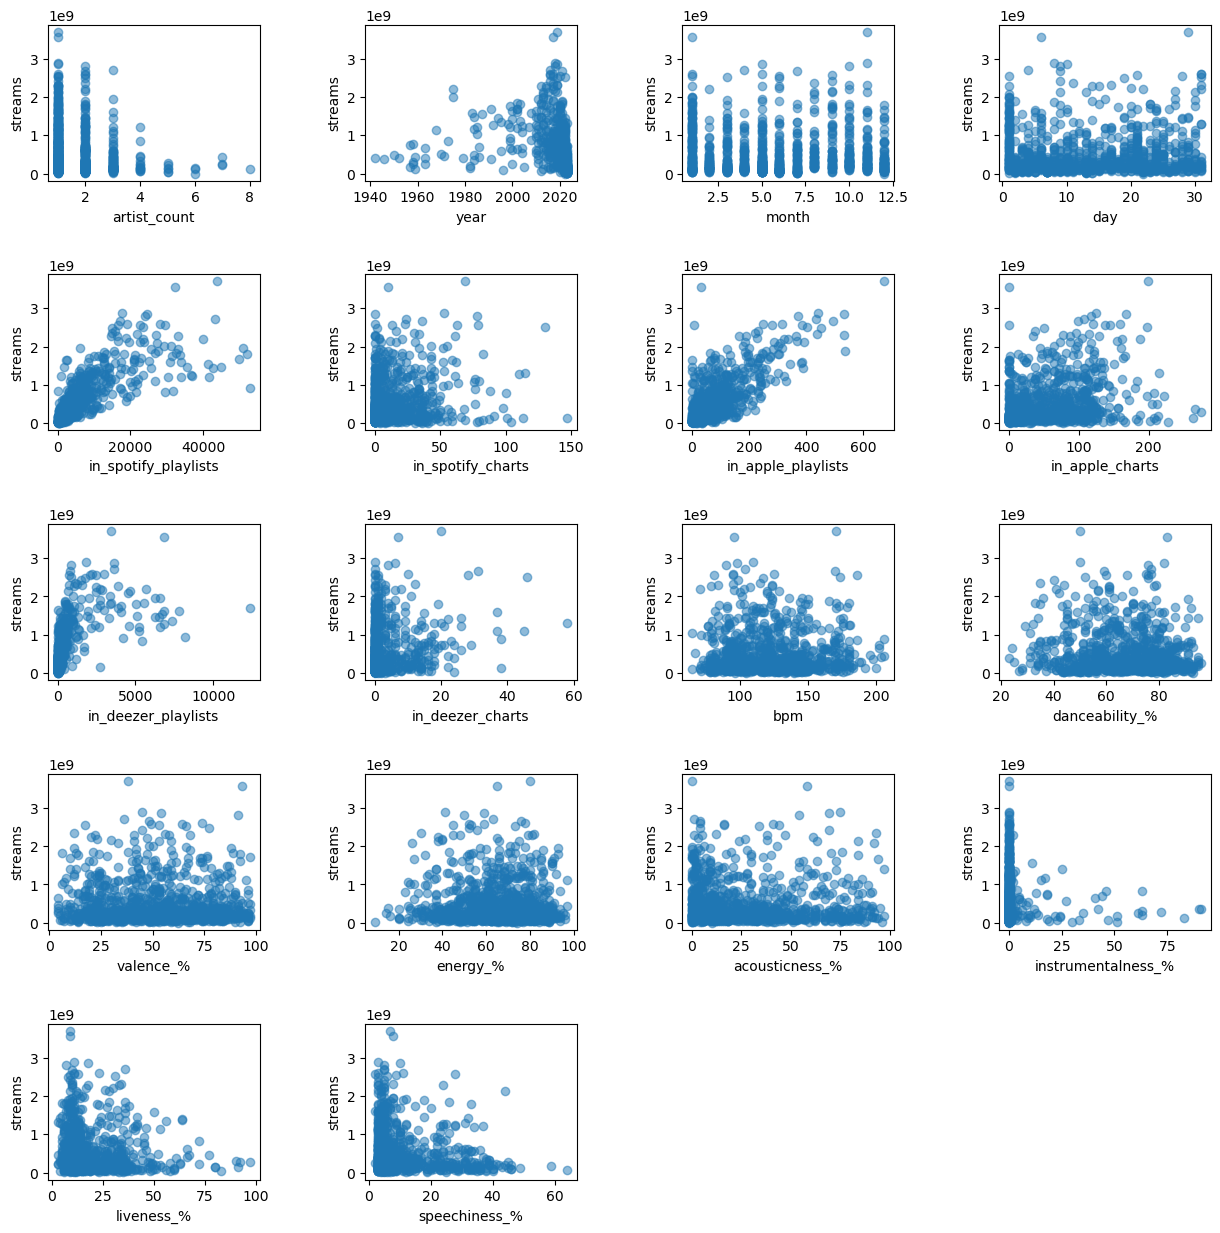

In [1146]:
scatterplots(features, ncol=4, figsize=(15, 15))

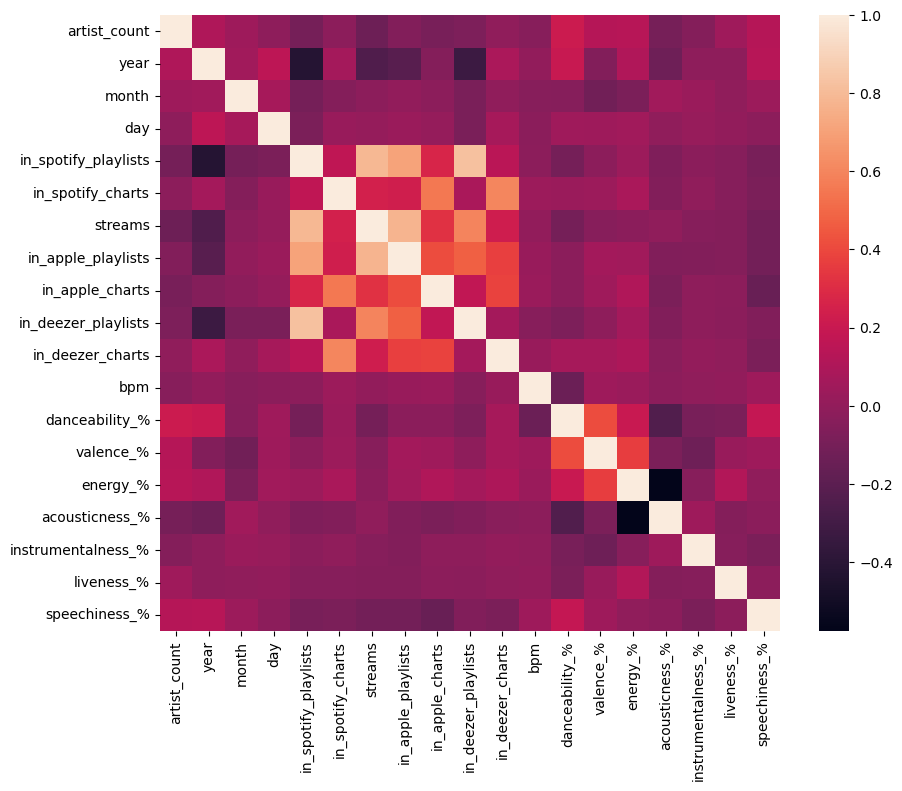

In [1147]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True));

It seems that the columns that most highly correlate with streams are the playlist columns. This makes sense, as being featured in a playlist would add to the number of times that song naturally gets streamed, as someone who might not otherwise stream the song might stream the playlist. This helps inform further strategy for our target of generating more streams: get the chosen songs in playlists across streaming service. The musical features don't seem to correlate too strongly with streams count, but we'll investigate this further with machine learning. From a general glance, it looks like acousticness, energy, and valence, might be among the strongest musical features to predict stream count.

## Possibly merge more data?

I found another data set about Spotify song features. It contains additional information about songs, such as the song's duration, that might further inform our analysis. It also contains feature ratings of many of the same features as our 2023 top-streamed songs. Looking at multiple feature ratings of songs gives us the opportunity to take an average of the two for a more balanced rating. Let's see how many songs overlap between the two data sets.

In [1148]:
df2 = pd.read_csv('spotify_additional_data.csv', encoding='utf-8')

In [1149]:
df2.T.info

<bound method DataFrame.info of                                                        0      \
Artist                                              Gorillaz   
Track                                         Feel Good Inc.   
Album                                             Demon Days   
Album_type                                             album   
Danceability                                           0.818   
Energy                                                 0.705   
Loudness                                              -6.679   
Speechiness                                            0.177   
Acousticness                                         0.00836   
Instrumentalness                                     0.00233   
Liveness                                               0.613   
Valence                                                0.772   
Tempo                                                138.559   
Duration_min                                        3.710667   
Title   

We don't need all of these fields. Let's just keep the ones we plan to merge on as well as the musical features.

In [1150]:
df2 = df2.drop(columns=['Album', 'Album_type', 'Title', 'Channel', 'Views', 'Likes', 'Comments', \
                        'Licensed', 'official_video', 'Stream', 'EnergyLiveness', 'most_playedon'])

In [1151]:
df2.head()

,Artist,Track,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min
0,Gorillaz,Feel Good Inc.,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667
1,Gorillaz,Rhinestone Eyes,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833
3,Gorillaz,On Melancholy Hill,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783
4,Gorillaz,Clint Eastwood,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000


As we will merge on the track names and artist names, let's lowercase all of these to cover for capitalization inconsistencies.

In [1152]:
df1_lower = df

In [1153]:
df1_lower['track_name'] = df1_lower['track_name'].str.lower()

In [1154]:
df1_lower['artist(s)_name'] = df1_lower['artist(s)_name'].str.lower()

In [1155]:
df2_lower = df2

In [1156]:
df2_lower['Track'] = df2_lower['Track'].str.lower()

In [1157]:
df2_lower['Artist'] = df2_lower['Artist'].str.lower()

In [1158]:
df3 = df1_lower.merge(df2_lower, how='left', left_on=['track_name', 'artist(s)_name'], right_on=['Track', 'Artist'])

Let's see how many of the songs overlap.

In [1159]:
df3.isna().sum()

track_name                0
artist(s)_name            0
artist_count              0
year                      0
month                     0
day                       0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
in_apple_playlists        0
in_apple_charts           0
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts         50
bpm                       0
key                      94
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
key_A                     0
key_A#                    0
key_B                     0
key_C                     0
key_C#                    0
key_D                     0
key_D#                    0
key_E                     0
key_F                     0
key_F#                    0
key_G                     0
key_G#              

It looks like 624 of the songs in our original data frame aren't contained in the second data frame, at least not with
the song names and artist names encoded with exactly the same spellings. In this case, we'll just stick with our original data frame; but it was worth a shot.

## Save Data

In [1060]:
df.to_csv('spotify_2023_cleaned.csv')

## Summary

Regression Records is seeking advice on which 3 of its songs to focus promotion on. The company wants to generate 300M streams on Spotify, and thus is assessing features of the top streamed songs from last year to consider which of its songs have similar musical features.

By looking at data from almost 1000 of 2023's top streamed songs, we were able to get a glimpse into how these songs' features vary. We did a thorough cleaning of the data, dropping values that had indecipherable errors in the encoding or extreme values that didn't fit in with the data set, converting encoding errors that were decipherable, and adjusting our data types for machine learning usage.

Additionally, we looked at some summary statistics of the features and how they relate to stream count. We observed the features that correlated most with stream count were the number of playlists the song was featured in. The musical features didn't seem to correlate as highly as we might have hoped, which may make our prediction on musical features less reliable, but we'll see if we can uncover more information about the association with machine learning.

We also tried to merge another data frame to also evaluate song duration, but there weren't enough overlapping songs to make this worthwhile. In a future analysis, it might also be helpful to investigate how song duration relates to stream count.